<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52030543667/in/dateposted-public/" title="Zoom Background"><img src="https://live.staticflickr.com/65535/52030543667_1ec272fe0c_w.jpg" width="400" height="225" alt="Zoom Background"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

#### Showing...

How confidance interval in Seaborn bar plot depends on standard deviation in the column.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
col_1 = np.array([1, 2, 3, 4, 4, 5, 6])
col_2 = np.array([3, 3, 3, 3, 3, 3, 3])
col_3 = np.array([1, 12, 25, 2, 0, 1, 1])

In [4]:
df = pd.DataFrame({"col1": col_1, "col2": col_2, "col3": col_3})

In [5]:
df

,col1,col2,col3
0,1,3,1
1,2,3,12
2,3,3,25
3,4,3,2
4,4,3,0
5,5,3,1
6,6,3,1


In [6]:
df.mean()

col1    3.571429
col2    3.000000
col3    6.000000
dtype: float64

In [7]:
df.std()

col1    1.718249
col2    0.000000
col3    9.345231
dtype: float64

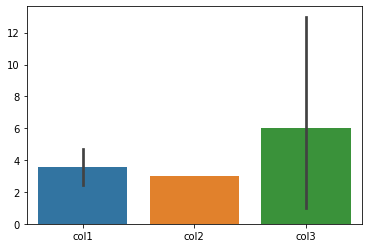

In [9]:
sns.barplot(data=df);

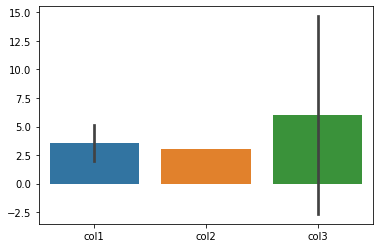

In [13]:
sns.barplot(data=df, ci='sd');

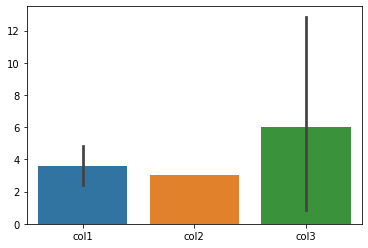

In [14]:
sns.barplot(data=df, ci=95);

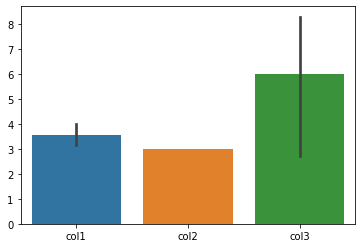

In [15]:
sns.barplot(data=df, ci=60);

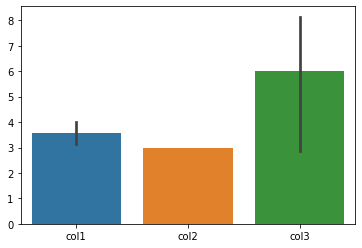

In [16]:
sns.barplot(data=df, ci=55);

## Bootstrapping Sandbox

In [48]:
def bootstrap(data, n=10):
    data = pd.Series(data)
    sample_size = len(data)
    averages = [data.mean()]
    for _ in range(n):
        bigpool  = pd.concat([data, data, data, data, data], axis=0)
        data     = bigpool.sample(sample_size)
        averages.append(data.mean())
    return averages

In [49]:
col_2

array([3, 3, 3, 3, 3, 3, 3])

In [43]:
pd.concat([pd.Series(col_3), pd.Series(col_3)])

0     1
1    12
2    25
3     2
4     0
5     1
6     1
0     1
1    12
2    25
3     2
4     0
5     1
6     1
dtype: int64

In [52]:
avgs = bootstrap(col_3, n=30)
avgs

[6.0,
 2.5714285714285716,
 1.0,
 0.8571428571428571,
 0.8571428571428571,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

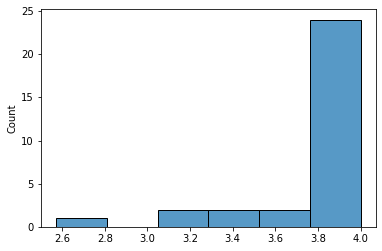

In [51]:
sns.histplot(avgs);